# This file contains the code for Question 1 - Part A, B and C

### Importing Data from the CSV file

In [1]:
%matplotlib inline
import string
import math
import numpy as np

f_train = open("training.1600000.processed.noemoticon.csv", "r", encoding="ISO-8859-1")
X_train = f_train.readlines()
f_test = open("testdata.manual.2009.06.14.csv", "r")
X_test = f_test.readlines()

#Creating the List with just the tweets and finding the number of positive and negative classes. (TRAINING) 
#class_0 = number of classes with label = 0
#class_4 = number of classes with label = 4

class_0=class_4=0

#tweets_train will store the processed tweets for the classifier model
tweets_train =[]
for x in X_train:
    a = x.split('","')
    if (a[0] == '"0'): class_0+=1
    else: class_4+=1
    tweets_train.append('%s"|"%s' % (a[0],a[-1]))

#Creating the List with just the tweets (TEST DATA)
tweets_test =[]
for x in X_test:
    a = x.split('","')
    tweets_test.append('%s"|"%s' % (a[0], a[-1]))
    
print("The length of the training set is = ", len(X_train))
print("The number of classes (label=4) =", class_4)
print("The number of classes (label=0) =", class_0)
print("The length of the test set is = ", len(X_test))

f_test.close()
f_train.close()

The length of the training set is =  1600000
The number of classes (label=4) = 800000
The number of classes (label=0) = 800000
The length of the test set is =  359


#Writing the tweets to a file (not necessary - REMOVE if not used anywhere later)
!rm -rf tweet_test.txt
!rm -rf tweet_train.txt
f = open("tweet_train.txt", "w")
for x in tweets_train:
    f.write(x)
f.close()

f = open("tweet_test.txt", "w")
for x in tweets_test:
    f.write(x)
f.close()

### So this is the python translate function that translates the original words by mapping first string to second string after removal of third string
    
### Here first and second string are empty so the word will remain as it is but lal punctuations will be gone

In [3]:
dictionary = {}
dict_0 = {}
dict_4 = {}
n = []
n_0 =[]
n_4 =[]

#The only preprocessing done for this part is lowercase, removing punctuations and splitting the words
for x in tweets_train:
    x = x.rstrip("\n\r")
    x = x.split("|")
    twt = x[1].translate(str.maketrans('','',string.punctuation)).lower()
    words = twt.split() # if I use split(" "), it takes more than one white space as a word
    n.append(len(words))
    if (x[0] == '"0"'): n_0.append(len(words)) 
    else: n_4.append(len(words))
    for w in words:
#Global Vocabulary
        if w in dictionary:
            dictionary[w]+=1
        else:
            dictionary[w]=1
#build Vocabulary for class 0 (-ve class)
        if (x[0] == '"0"'):
            if w in dict_0:
                dict_0[w]+=1
            else:
                dict_0[w]=1
#build Vocabulary for class 4 (+ve class)
        else:
            if w in dict_4:
                dict_4[w]+=1
            else:
                dict_4[w]=1


In [5]:
def train_nb_classifier(dictionary,dict_0, dict_4, len_tweets, n_0, n_4, class_0, class_4):
    v = len(dictionary)
    theta_0 = {}
    theta_4 = {}
    n_0 = sum(n_0)
    n_4 = sum(n_4)
    c=1
    for word in dictionary.keys():
            if word in dict_0:
                theta_0[word] = ((dict_0[word]+c)/(n_0 + v*c))
            else:
                theta_0[word] = ((c) / (n_0 + v*c))
            if word in dict_4:
                theta_4[word] = ((dict_4[word]+c)/(n_4 + v*c))
            else:
                theta_4[word] = ((c)/(n_4 + v*c))
    return theta_0, theta_4;

In [4]:
m= len(X_train)
phi_0 = class_0/m
phi_4 = class_4/m


In [6]:
print("\n----------------Training a NB model on Raw-Data---------------------------\n")

theta_0, theta_4 = train_nb_classifier(dictionary, dict_0, dict_4, n, n_0, n_4, class_0, class_4)

In [46]:
def test_data(tweets, theta_0, theta_4):
    pred_class=[]
    actual_class=[]
    t0=[];t4=[]
    for x in tweets:
        test_class0=test_class4=0
        x = x.rstrip("\n\r")
        x = x.split("|")
        twt = x[1].translate(str.maketrans('','',string.punctuation)).lower()
        words = twt.split() # if I use split(" "), it takes more than one white space as a word
        
        #Store actual class number in Test Data for forming Confusion matrix
        actual_class.append(x[0])
        
        #Finding probability of tweet being in a class         
        for w in words:
            if w in theta_0: test_class0 += math.log(theta_0[w])
            else: test_class0 += math.log(1)
            if w in theta_4: test_class4 += math.log(theta_4[w])
            else: test_class4 += math.log(1)
        test_class0 += math.log(phi_0)
        test_class4 += math.log(phi_4)
        t0.append(test_class0)
        t4.append(test_class4)
        #Classifying the probability into classes
        if (test_class0 > test_class4): pred_class.append('"0"')
        else: pred_class.append('"4"')
    
    range0= max(t4)-min(t4)
    range1=max(t0)-min(t0)
    t0 =[x/range1 for x in t0]
    t4 =[x/range0 for x in t4]
    for i in range(len(t0)):
        t4[i]=t4[i]/(t0[i]+t4[i])
        t0[i]=t0[i]/(t0[i]+t4[i])
       
    actual_class=[0 if x=='"0"' else 1 for x in actual_class]
    pred_class=[0 if x=='"0"' else 1 for x in pred_class]
    test_error = sum(np.bitwise_xor(actual_class, pred_class))
    accuracy = ((len(tweets) - test_error)/len(tweets))*100
    return accuracy, actual_class, pred_class, t0, t4;

In [41]:
train_accuracy,actual_class_train,pred_class_train, prob0, prob4 = test_data(tweets_train, theta_0, theta_4)
print("Result (a) : The train accuracy of the model on raw data is = {:2.3f}%".format(train_accuracy))

Result (a) : The train accuracy of the model on raw data is = 84.211%


In [47]:
test_accuracy, actual_class,pred_class, prob0, prob4 = test_data(tweets_test, theta_0, theta_4)
print("Result (a) : The test accuracy of the model on raw data is = {:2.3f}%".format(test_accuracy))

Result (a) : The test accuracy of the model on raw data is = 80.780%


# Part(b)

In [10]:
def random_pred(tweets):
    acc=[]
    for i in range(len(tweets)):
        ran_acc = np.random.random()
        if (ran_acc >= 0.5): acc.append(1)
        else: acc.append(0)
    accuracy = (sum(acc)/len(acc))*100
    return accuracy

In [11]:
test_accuracy_random = random_pred(tweets_test)
test_accuracy_majority = (max(class_0, class_4)/m)*100 #Since both classes are equally probable in this case

In [12]:
print("\n-----------------------Random and Majority Prediction Models---------------------------\n")

print("Result (b) : The test accuracy of the model by random predictions={:2.3f}%".format(test_accuracy_random))
print("Result (b) : The test accuracy of the model by majority predictions={:2.3f}%".format(test_accuracy_majority))
print("Improvement obtained over random baseline is = {:2.3f} times".format(test_accuracy/test_accuracy_random))
print("Improvement obtained over majority baseline is = {:2.3f} times".format(test_accuracy/test_accuracy_majority))


Result (b) : The test accuracy of the model by random predictions=48.468%
Result (b) : The test accuracy of the model by majority predictions=50.000%
Improvement obtained over random baseline is = 1.667 times
Improvement obtained over majority baseline is = 1.616 times


# Part(c) : Confusion Matrix on Test Data

In [13]:
def create_confusion_matrix(actual_class, pred_class):
    numPred_l4=sum(pred_class)
    numPred_l0=len(pred_class)-numPred_l4

    numAct_l4=sum(actual_class)
    numAct_l0=len(actual_class)-numAct_l4

    print("Number of Actual class 0=", numAct_l0)
    print("Number of Actual Class 4=", numAct_l4)

    print("Number of Predictions for class 0 =",numPred_l0)
    print("Number of Predictions for class 4 =",numPred_l4)
    true_neg=true_pos=0
    false_pos=false_neg=0
    for i in range(len(actual_class)):
        if (actual_class[i]==pred_class[i]) and (pred_class[i] == 0):
            true_neg+=1
        elif(actual_class[i] == pred_class[i]) and (pred_class[i] == 1):
            true_pos+=1
        elif(pred_class[i] == 0):
            false_neg+=1
        else:
            false_pos+=1

    print("\n")
    print("Number of true negatives (class=0):",true_neg)
    print("Number of true positives (class=4):",true_pos)
    print("Number of false negatives (class=0):",false_neg)
    print("Number of false positives (class=4):", false_pos)
    return np.array([[true_neg, false_neg], [false_pos, true_pos]])

In [14]:
print("\n-----------------------Creating the Confusion Matrix for Model---------------------------\n")

conf_matrix = create_confusion_matrix(actual_class, pred_class)

Number of Actual class 0= 177
Number of Actual Class 4= 182
Number of Predictions for class 0 = 190
Number of Predictions for class 4 = 169


Number of true negatives (class=0): 149
Number of true positives (class=4): 141
Number of false negatives (class=0): 41
Number of false positives (class=4): 28


In [15]:
print("The confusion Matrix is =\n", conf_matrix)

print("\n-------------Plotting Confusion Matrix and ROC curve---------------------------\n")

The confusion Matrix is =
 [[149  41]
 [ 28 141]]


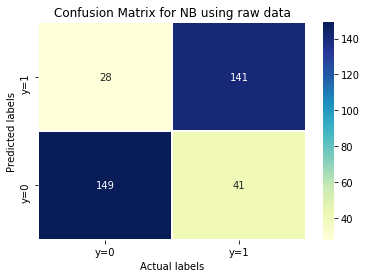

In [16]:
#Print confusion matrix (Code help from stackoverflow)
import seaborn as sns
import matplotlib.pyplot as plt     
fig = plt.figure()
ax= fig.add_subplot(111)
sns.heatmap(conf_matrix, annot=True, ax = ax, fmt="d",linewidths=1, cmap="YlGnBu"); #annot=True to annotate cells
ax.set_ylim([0,2]) # Workaround to display values in the center, to avoid downgrade to matplotlib3.1.1
ax.set_xlabel('Actual labels');
ax.set_ylabel('Predicted labels'); 
ax.set_title('Confusion Matrix for NB using raw data'); 
ax.xaxis.set_ticklabels(['y=0', 'y=1']); ax.yaxis.set_ticklabels(['y=0', 'y=1']);
#plt.savefig('conf_matrix_Partc.png', dpi=1000, bbox_inches='tight')

plt.show()

The AUC score for this classifier model is =  0.8887129819333209


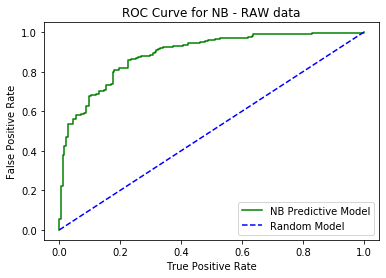

In [53]:
import numpy as np

from sklearn import metrics
from sklearn.metrics import auc

fpr, tpr, thresholds = metrics.roc_curve(actual_class, prob4, drop_intermediate=True)
import matplotlib.pyplot as plt
plt.plot(tpr,fpr, c='g', label='NB Predictive Model')
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ROC Curve for NB - RAW data")
plt.plot(tpr, tpr, linestyle='--', c='b', label='Random Model')
auc = auc(tpr, fpr)
print("The AUC score for this classifier model is = ", auc)
#plt.savefig('roc_raw-data.png', dpi=1000, bbox_inches='tight')
plt.legend()
plt.show()